# Ajuste de curvas: pêndulo amortecido

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

## Experimento: pêndulo amortecido


![Pêndulo simples com um celular](img/pendulo_fisico.jpg)


A figura acima mostra um celular com acelerômetro preso a uma tabula de madeira pendurada na parte superior por um apoio. O sistema inteiro (tábua + celular) pode oscilar ao redor do ponto de apoio, de forma que o sistema assemelha-se a um pêndulo simples. Na prática, o sistema é um pêndulo físico, mas a equação de movimento de um pêndulo físico é idêntica ao do pêndulo simples.

Podemos utilizar aplicativos de celular que medem a aceleração linear nos eixos x, y e z, desde que o seu celular possua um acelerômetro. Uma sugestão é utilizar o aplicativo [Sensor Kinetics Pro](https://www.rotoview.com/sensor_kinetics_pro.htm), que permite armazenar os dados para uso posterior. 

Para estudar este material, você precisa fazer o download dos arquivos acc_10graus.csv e acc_25graus.csv neste [link]()

*

Segue abaixo os dados medidos:



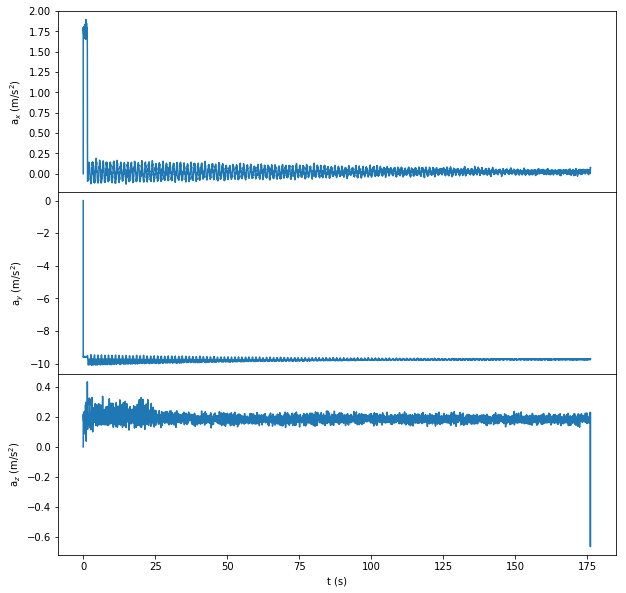

In [125]:
import numpy as np
import matplotlib.pyplot as plt

tmp = np.loadtxt('data/aula12_10graus_acc.csv',delimiter = ';')

t  = tmp[:,0]
ax = tmp[:,1]
ay = tmp[:,2]
az = tmp[:,3]

f, (pl1, pl2, pl3) = plt.subplots(3, sharex=True,figsize=(10,10))
pl1.plot(t, ax)
pl1.set_ylabel('a$_x$ (m/s$^2$)')

pl2.plot(t, ay)
pl2.set_ylabel('a$_y$ (m/s$^2$)')

pl3.plot(t, az)
pl3.set_ylabel('a$_z$ (m/s$^2$)')
pl3.set_xlabel('t (s)')

f.subplots_adjust(hspace=0)


### Limpeza nos dados medidos

Note que há um pico no início e no fim, provavelmente por causa do lançamento inicial e para parar o movimento do pêndulo. Precisamos limpar estes dados. Note que no final, os picos estranhos somem.

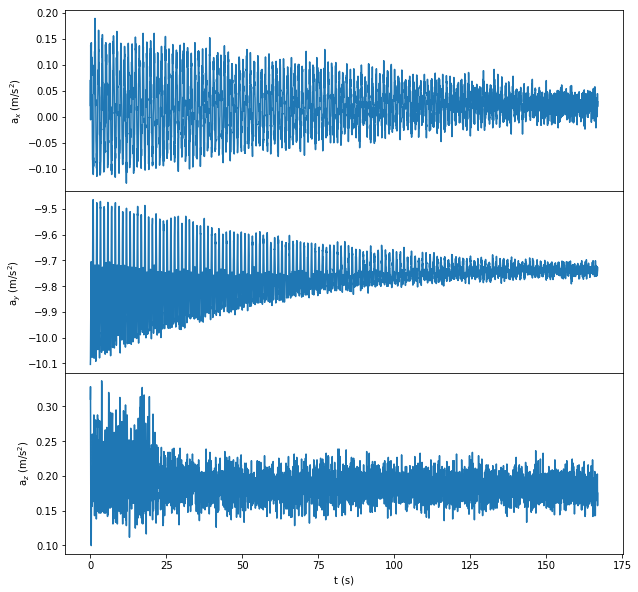

In [126]:
id = np.where((t >= 3) & (t <=170))
t  = t[id]
ax = ax[id]
ay = ay[id]
az = az[id]
t = t - t[0]
    

f, (pl1, pl2, pl3) = plt.subplots(3, sharex=True,figsize=(10,10))
pl1.plot(t, ax)
pl1.set_ylabel('a$_x$ (m/s$^2$)')

pl2.plot(t, ay)
pl2.set_ylabel('a$_y$ (m/s$^2$)')

pl3.plot(t, az)
pl3.set_ylabel('a$_z$ (m/s$^2$)')
pl3.set_xlabel('t (s)')

f.subplots_adjust(hspace=0)    



### Modelo teórico

A observação dos dados acima mostra uma clara oscilação amortecida em $a_x(t)$ e $a_y(t)$. Nota-se também que a medida de $a_y(t)$ também detectou a aceleração da gravidade. Este comportamento é compatível com o movimento sub-amortecido do pêndulo cuja solução (no limite de pequenos ângulos) é:

$$ \theta(t) = \theta_0 e^{- q t} \sin (\omega' t + \phi) $$

A posição $(x,y)$ do pêndulo é dada por:

$$ x(t) = L \sin \theta (t) $$
$$ y(t) = L [1 - \cos \theta (t)] $$

A velocidade e aceleração em $x$ tornam-se:

$$v_x(t) = \frac{d x(t)}{d t} = L\cos \theta(t) \dot{\theta}(t) $$
$$a_x(t) = \frac{d v_x(t)}{d t} = L\cos \theta(t) \ddot{\theta}(t) - L\sin\theta(t) \dot{\theta}^2(t)$$

A velocidade e aceleração em $y$ tornam-se:

$$v_y(t) = \frac{d y(t)}{d t} = L\sin \theta(t) \dot{\theta}(t) $$
$$a_y(t) = \frac{d v_y(t)}{d t} = L\sin \theta(t) \ddot{\theta}(t) + L\cos\theta(t) \dot{\theta}^2(t)$$

Todas as expressões acima são bastante complicadas, e faremos uma simplificação logo no início. Sabe-se que $\sin \theta \approx \theta$ para $\theta << 1$. Assumindo que o experimento foi realizado com um ângulo inicial muito pequeno, assumimos que:

$$ x(t) = L \sin \theta(t) \approx L \theta(t) $$
$$ a_x(t) \approx L \ddot{\theta}(t) $$ 

Para ajustar $a_y(t)$ deve-se considerar $\cos \theta \approx 1 - \theta^2$/2, de forma que $y(t) = (L/2)\theta^2(t)$ e $a_y(t) = \theta(t)\ddot{\theta}(t)+\dot{\theta}^2(t)$. Finalmente, o nosso modelo analítico para os dados experimentais de $a_x(t)$ é:

$$ a_x(t) = a_0 (b^2 - \omega'^2) e^{-b t}\sin (\omega't + \phi) - 2 a_0 \omega'b e^{-b t}\cos (\omega't + \phi) $$

onde $a_0 = L\theta_0$. Temos então 4 parâmetros de ajuste: $a_0$, $b$, $\omega'$ e $\phi$.

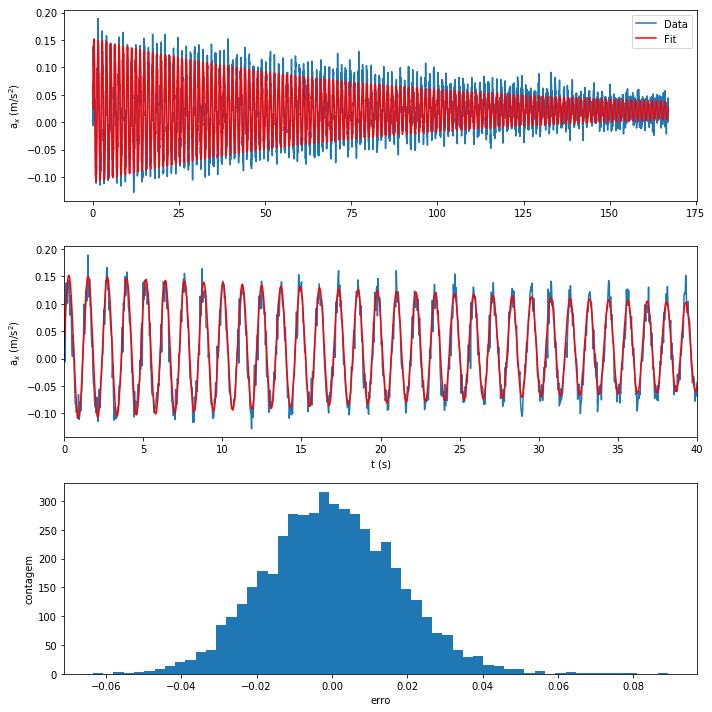

------------------------------------
          Parâmetros                
------------------------------------
[4.97325369e-03 1.21733032e-02 5.15692058e+00 4.40391741e+00
 2.11628314e-02]


In [127]:
# Esta parte do código define uma função com o modelo teórico de a_x(t) que ajustará os dados experimentais
# Note também é necessário limitar os tesmpor de ajuste entre 0 e inf.

from scipy import optimize

# definicção da função de ajuste
def accx(t,a0,b,w,phi,cte):
    return a0*np.exp(-b*t)*(b**2-w**2)*np.sin(w*t+phi) - 2*a0*b*w*np.exp(-b*t)*np.cos(w*t+phi) + cte

# Fitting dos dados experimentais
p, params_covariance = optimize.curve_fit(accx, t, ax, 
                                p0 = [1,  0.1,  5,  1,  0.02],
                                bounds = ((0, 0, 0, 0, 0),(np.inf, np.inf, np.inf, np.inf, np.inf)))

# Erro entre os dados reais e os daso fitados
erro = accx(t, p[0], p[1], p[2], p[3], p[4]) - ax

# Plotagem dos dados

f, (pl1, pl2, pl3) = plt.subplots(3,1, figsize=(10,10))
pl1.plot(t, ax, label='Data')
pl1.plot(t, accx(t, p[0], p[1], p[2], p[3], p[4]), color='red', label='Fit')
pl1.set_ylabel('a$_x$ (m/s$^2$)')
pl1.legend()

pl2.plot(t, ax, label='Data')
pl2.plot(t, accx(t, p[0], p[1], p[2], p[3], p[4]),color='red', label='Fit')
pl2.set_ylabel('a$_x$ (m/s$^2$)')
pl2.set_xlim(0,40)
pl2.set_xlabel('t (s)')

pl3.hist(erro, bins='auto')  # histograma dos erros
pl3.set_ylabel('contagem')
pl3.set_xlabel('erro')

f.tight_layout()
plt.show()

print('------------------------------------')
print('          Parâmetros                ')
print('------------------------------------')
print(params)